## Functional Requirements

1. The software must be able to learn a model from a supervised dataset.
2. The software must be able to use the learned model to estimate the target value of problem instances.
3. The software must be able to compute a quality metric of the learned model.

## Necessary Deliverables

1. Python application, or applications, that perform ETL, training and testing.
2. Report containing quality metrics, and explanation of the dataset, and the experimental procedure (whether a single split was performed, or cross-validation, etc.).


## Rubric
* Separate dataframes for attribute values, and target values: 1 point.
* Model trained and evaluated: 2 points.
* Model used for estimation of new instances: 1 point.
* Different experiments performed using different models, to determine best choice: up to 2 points.

In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/train.csv')
bikes = train.copy()
bikes_test = test.copy()

#### Data Fields

	datetime - hourly date + timestamp  
	season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
	holiday - whether the day is considered a holiday
	workingday - whether the day is neither a weekend nor holiday
	weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
	2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
	3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
	4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
	temp - temperature in Celsius
	atemp - "feels like" temperature in Celsius
	humidity - relative humidity
	windspeed - wind speed
	casual - number of non-registered user rentals initiated
	registered - number of registered user rentals initiated
	count - number of total rentals

In [3]:
bikes.shape

(10886, 12)

In [4]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
bikes.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [6]:
bikes.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [7]:
import pandas_profiling

#bikes.profile_report(title='Summary') 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a18db5828>,
      dtype=object)

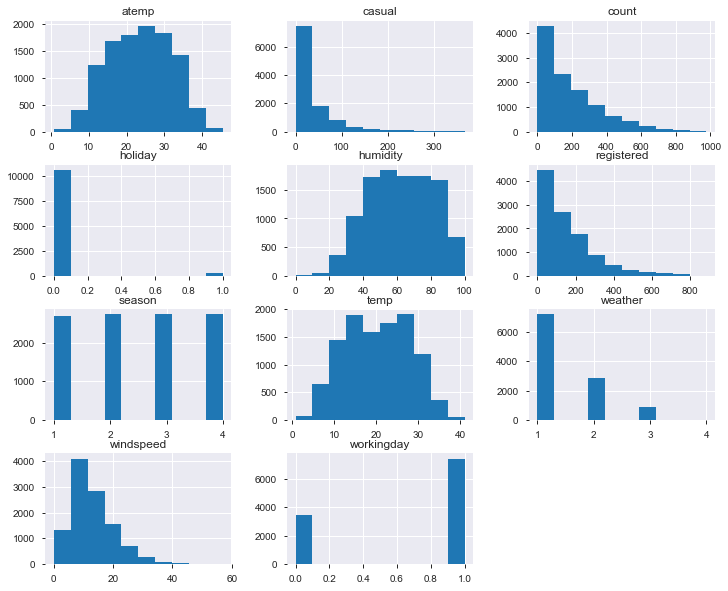

In [8]:
bikes.hist(figsize=(12,10))

### Highly correlated variables

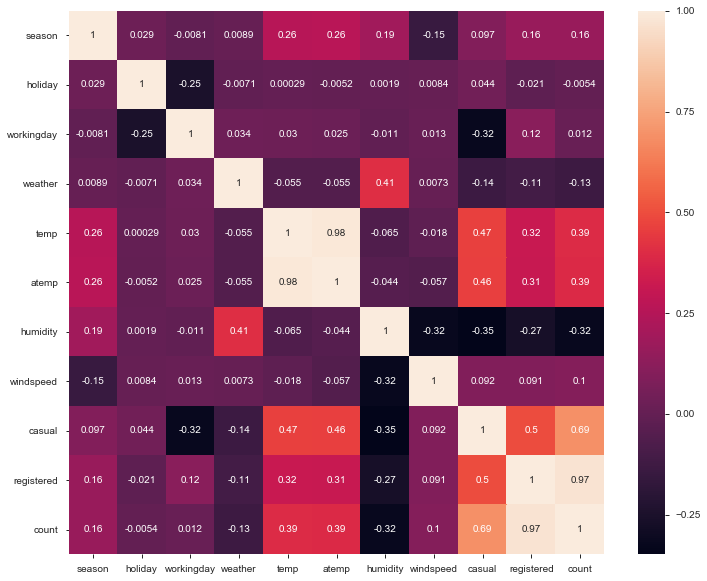

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (12,10))
sns.heatmap(bikes.corr(), annot=True)

In [10]:
# registered is highly correlated with count & temp is highly correlated with atemp, will drop those:
bikes_drop = bikes.copy()
bikes_drop.drop(['registered', 'atemp'], inplace=True, axis=1)

In [11]:
# ?? bikes_drop.drop(['casual'], inplace=True, axis=1)

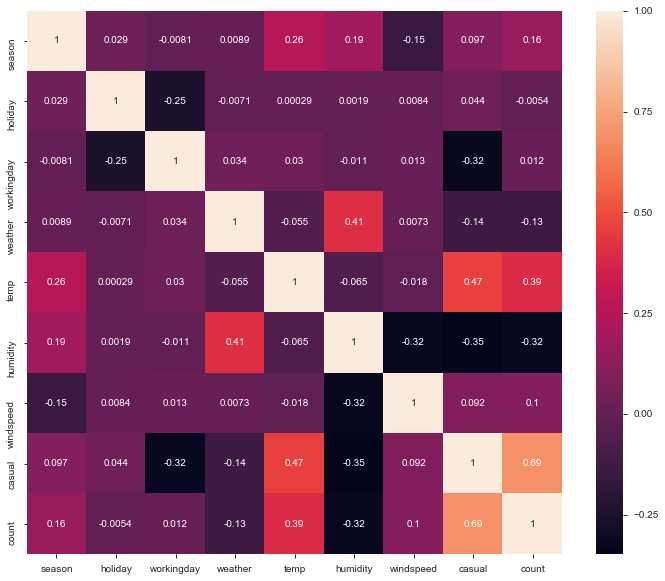

In [12]:
plt.figure(figsize = (12,10))
sns.heatmap(bikes_drop.corr(), annot=True)

### Null values

In [13]:
bikes_drop.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
humidity      0
windspeed     0
casual        0
count         0
dtype: int64

In [14]:
# windspeed & casual contain 0, but both can have 0 as actual value, so there's no need to work on these values

### Convert datetime & do feature engineering

In [15]:
bikes_drop["datetime"]= pd.to_datetime(bikes["datetime"]) 

In [16]:
bikes_drop.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
humidity               int64
windspeed            float64
casual                 int64
count                  int64
dtype: object

In [17]:
# Cut datetime to have date & hour, day, month, year:
bikes_drop['hour'] = bikes_drop.datetime.apply(lambda x: x.hour)
bikes_drop['day'] = bikes_drop.datetime.apply(lambda x: x.day)
bikes_drop['month'] = bikes_drop.datetime.apply(lambda x: x.month)
bikes_drop['year'] = bikes_drop.datetime.apply(lambda x: x.year)

In [18]:
bikes_drop.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,count,hour,day,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0,3,16,0,1,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0,8,40,1,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0,5,32,2,1,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0,3,13,3,1,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0,0,1,4,1,1,2011


In [19]:
#datetime: add week day: dayofweek 0-6)/day_name(actual names)
#bikes_drop['dayofweek'] = bikes_drop.datetime.dt.day_name()
#bikes_drop.dayofweek.value_counts()

In [20]:
# Create Time of day category for time slots:
#day_labels = ['night', 'morning', 'afternoon', 'evening']
#cutoffs = [-1, 5, 11, 17, 23]
#bikes_drop['timeofday'] = pd.cut(bikes_drop['hour'], cutoffs, labels=day_labels)
#bikes_drop.timeofday.value_counts()

### Handle Categorical Data

In [21]:
# Dayofweek, timeofday, season & weather: one hot encoding
bikes_dummy = pd.get_dummies(data=bikes_drop, columns=['season', 'weather']) 
#bikes_dummy = pd.get_dummies(data=bikes, columns=['dayofweek', 'timeofday']) 

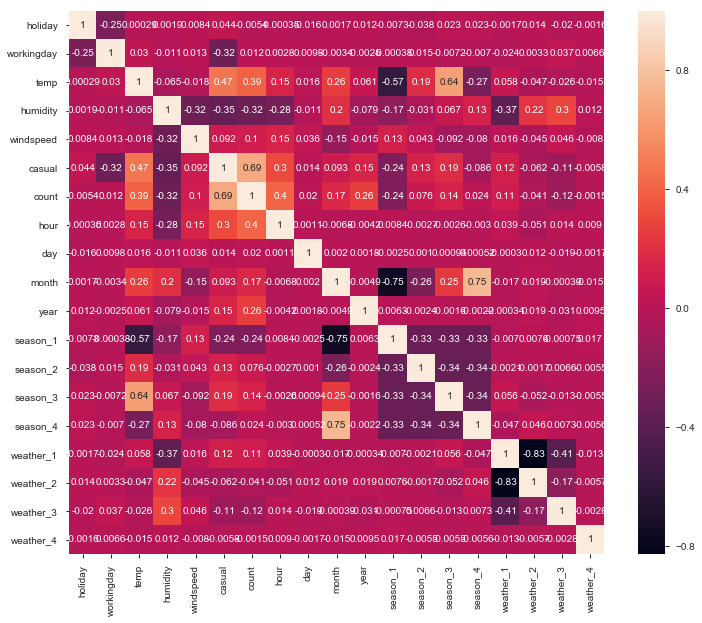

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,10))
sns.heatmap(bikes_dummy.corr(), annot=True)

In [23]:
# Drop datetime column:
bikes_dummy.drop('datetime', inplace=True, axis=1)

In [24]:
# ?? or set datetime as index before creating model:
# bikes_dummy.set_index('datetime', inplace=True)

In [25]:
bikes_dummy.head()

,holiday,workingday,temp,humidity,windspeed,casual,count,hour,day,month,year,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,0,9.84,81,0.0,3,16,0,1,1,2011,1,0,0,0,1,0,0,0
1,0,0,9.02,80,0.0,8,40,1,1,1,2011,1,0,0,0,1,0,0,0
2,0,0,9.02,80,0.0,5,32,2,1,1,2011,1,0,0,0,1,0,0,0
3,0,0,9.84,75,0.0,3,13,3,1,1,2011,1,0,0,0,1,0,0,0
4,0,0,9.84,75,0.0,0,1,4,1,1,2011,1,0,0,0,1,0,0,0


### Modeling, Prediction, and Evaluation

In [26]:
from sklearn.model_selection import train_test_split

X_cols = [col for col in bikes_dummy.columns.values if col != 'Count']
X = bikes_dummy[X_cols]
y = bikes_dummy['count']

# Your code here:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=8)

/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


#### Linear Regression

In [27]:
from sklearn import linear_model 

bikes_model = linear_model.LinearRegression()
bikes_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
y_test_pred = bikes_model.predict(X_test)

In [29]:
#Evaluate:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_test, y_test_pred)

9.743976998129764e-28

#### Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor

bikes_model_rf = RandomForestRegressor()
bikes_model_rf.fit(X_train, y_train)

y_test_pred_rf = bikes_model_rf.predict(X_test)

/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [31]:
#Evaluate
mean_squared_log_error(y_test, y_test_pred_rf)

1.2906387669554655e-07